In [43]:
import math
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt

plt.rcParams['font.sans-serif'] = ['Arial Unicode MS']  # 用来正常显示中文标签
plt.rcParams['axes.unicode_minus'] = False  # 用来正常显示负号

In [1]:
# 直径为4时 s = $\ell_2 + \ell_4$ p = $\ell_2 \cdot \ell_4$

def compute_p(n):
    max_value = -np.inf
    min_value = np.inf
    best_s = best_p = bad_s = bad_p = 0

    s_values = np.linspace(0, n - 5, 500)
    for s in s_values:
        p_max = s ** 2 / 4
        p_values = np.linspace(0, p_max, 200)

        for p in p_values:
            A = n ** 2 - 5 + s * n - 4 * s - s ** 2 + 2 * p
            B = (3 * n ** 2 - n + 7 + 9 * s - 2 * n * s + 2 * s ** 2 - 3 * p) / 12
            P = A * B

            if P > max_value:
                max_value = P
                best_s, best_p = s, p
            if P < min_value:
                min_value = P
                bad_s, bad_p = s, p

    return {
        "max_value": max_value,
        "min_value": min_value,
        "best_s": best_s,
        "best_p": best_p,
        "bad_s": bad_s,
        "bad_p": bad_p
    }


# 测试 n = 10
result = compute_p(10)
print("最大值：", result["max_value"])
print("最小值：", result["min_value"])
print("取得最大值时的 s ≈ {:.2f}, p ≈ {:.2f}".format(result["best_s"], result["best_p"]))
print("取得最小值时的 s ≈ {:.2f}, p ≈ {:.2f}".format(result["bad_s"], result["bad_p"]))

最大值： 2561.71875
最小值： 2351.25
取得最大值时的 s ≈ 5.00, p ≈ 6.25
取得最小值时的 s ≈ 0.00, p ≈ 0.00


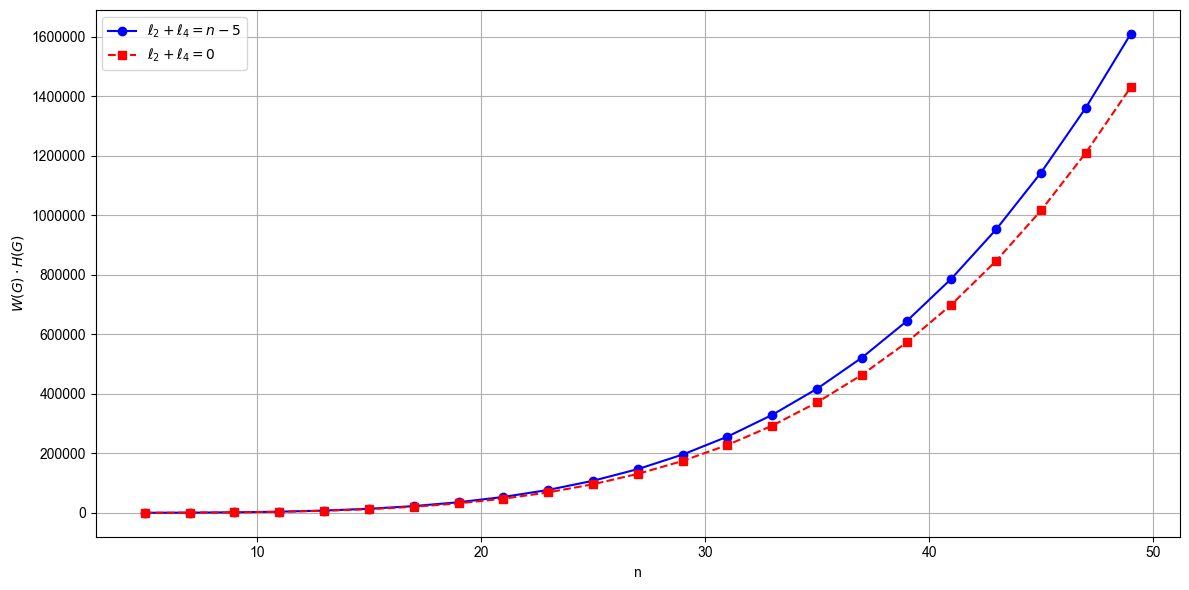

In [11]:
# $\ell_2 + \ell_4 = n - 5$ 和 $\ell_2 + \ell_4 = 0$ 的双曲线对比
def p_max(n):
    return ((3 * n ** 2 - 8 * n + 5) * (9 * n ** 2 + 22 * n - 27)) / 96


def p_min(n):
    return ((n ** 2 - 5) * (3 * n ** 2 - n + 7)) / 12


# 生成奇数序列 n = 5, 7, ..., 49
n_values = np.arange(5, 50, 2)

# 计算对应的乘积值
p_max_values = [p_max(n) for n in n_values]
p_min_values = [p_min(n) for n in n_values]

# 绘图
plt.figure(figsize=(12, 6))
plt.plot(n_values, p_max_values, marker='o', linestyle='-', color='blue', label=r'$\ell_2 + \ell_4 = n - 5$')
plt.plot(n_values, p_min_values, marker='s', linestyle='--', color='red', label=r'$\ell_2 + \ell_4 = 0$')

# plt.title(r"$W(G) \cdot H(G)$随奇数$n$增加的变化")
plt.xlabel("n")
plt.ylabel(r"$W(G) \cdot H(G)$")
plt.grid(True)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  # 禁用科学计数法
plt.tight_layout()
plt.savefig('/Users/zhuzijie/Documents/first/figures/d=4.png', dpi=300, bbox_inches='tight')
plt.show()

In [12]:
def calculate_max_product(n):
    max_product = 0
    for l2 in range(n - 4):  # l2 starts from 0 to n-5
        l4 = n - 5 - l2
        # 使用正确的公式计算乘积P
        product = ((3 * n ** 2 - 8 * n + 5) * (9 * n ** 2 + 22 * n - 27)) / 96 if l2 == (n - 5) / 2 else None
        # 这里需要根据实际的乘积计算公式调整
        # 假设上面的product计算是基于特定条件下的最大值估计
        # 实际应用中，应替换为准确的乘积计算公式

        if product is not None and product > max_product:
            max_product = product
    return max_product


# 测试代码
for n in range(5, 20, 2):  # 仅考虑n为奇数的情况
    print(f"n={n}, 最大乘积值: {calculate_max_product(n)}")

n=5, 最大乘积值: 128.33333333333334
n=7, 最大乘积值: 568.0
n=9, 最大乘积值: 1650.0
n=11, 最大乘积值: 3803.3333333333335
n=13, 最大乘积值: 7565.0
n=15, 最大乘积值: 13580.0
n=17, 最大乘积值: 22601.333333333332
n=19, 最大乘积值: 35490.0


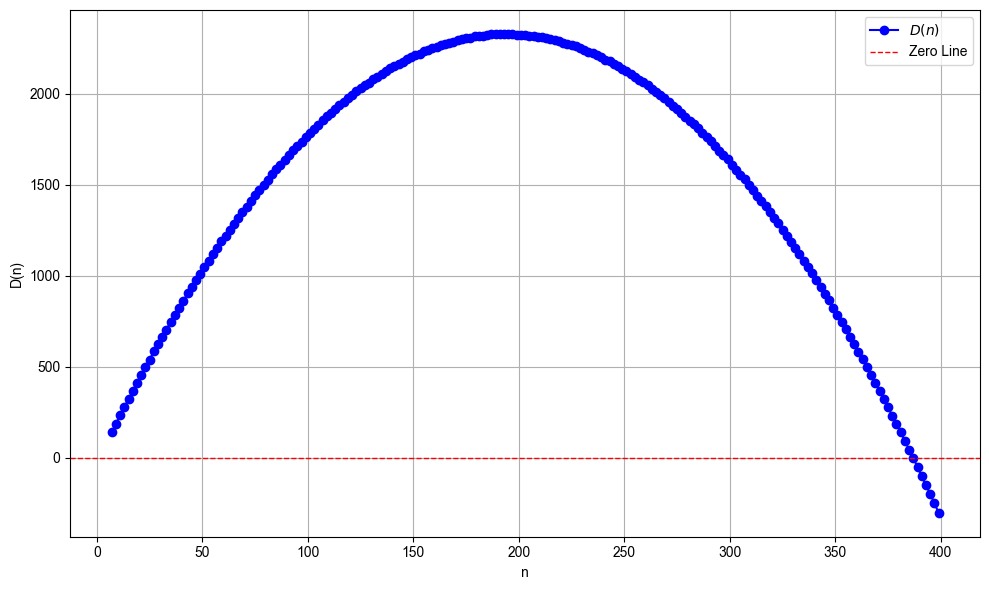

In [42]:
def compute_D(n, s=None):
    s = s
    return 3 * n ** 2 - 2 * n + 29 + 30 * s - 7 * n * s + 4 * s ** 2


# 设置 n 的范围（例如从 7 到 101）
n_values = np.arange(7, 401, 2)
D1_values = [compute_D(n, math.floor((7 * n - 30) / 8)) for n in n_values]
D2_values = [compute_D(n, n - 5) for n in n_values]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(n_values, D1_values, marker='o', linestyle='-', color='b', label=r'$D(n)$')
# plt.plot(n_values, D2_values, marker='x', linestyle='--', color='g', label=r'$D(n)$')
plt.axhline(0, color='r', linestyle='--', linewidth=1, label='Zero Line')

# plt.title(r'Plot of $ D(n) = 3n^2 - 2n + 29 + 30s - 7ns + 4s^2 $')
plt.xlabel('n')
plt.ylabel('D(n)')
plt.grid(True)
plt.legend()
plt.tight_layout()

plt.savefig('/Users/zhuzijie/Documents/first/figures/d=4_1.png', dpi=300, bbox_inches='tight')

# 显示图形
plt.show()

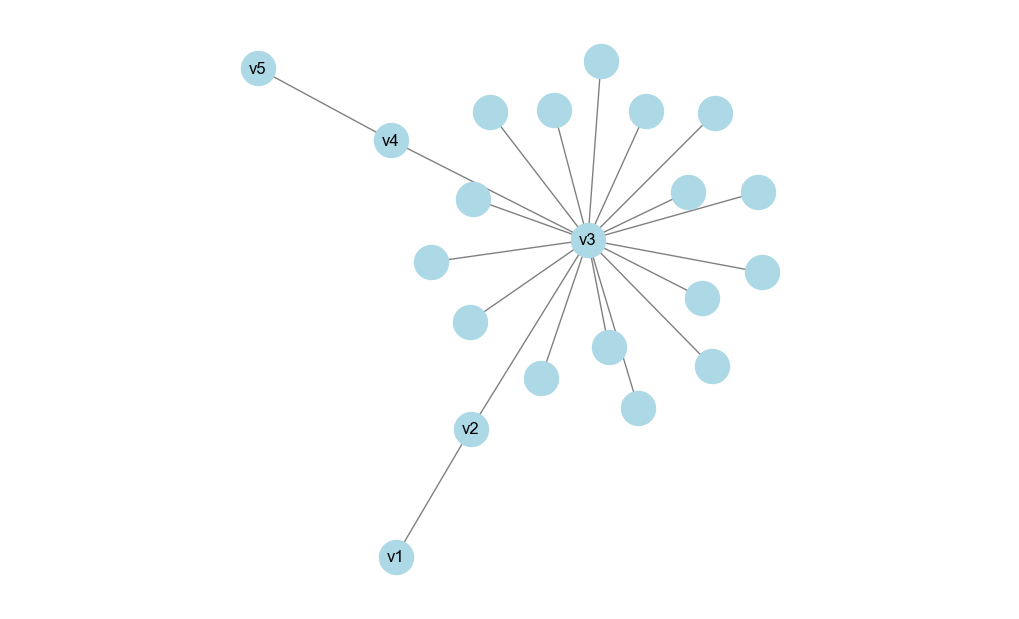

In [68]:
def create_custom_graph(n):
    if n < 6:  # 确保至少有6个节点以满足要求
        print("节点数量必须大于等于6")
        return

    G = nx.Graph()

    # 定义特殊节点
    special_nodes = ['v1', 'v2', 'v4', 'v5']

    # 添加特殊节点间的边
    edges = [('v1', 'v2'), ('v2', 'v3'), ('v3', 'v4'), ('v4', 'v5')]
    G.add_edges_from(edges)

    # 添加其他所有节点并链接到v3
    for i in range(n - 5):
        # node_name = f"v{i+6}"  # 节点名从v6开始
        G.add_edge(i, 'v3')

    return G


# 创建图
n = 21  # 举例来说，n=10
G = create_custom_graph(n)

# # 绘制图形
# pos = nx.spring_layout(G)
# nx.draw(G, pos, with_labels=False, node_color='lightblue')
# plt.savefig('/Users/zhuzijie/Documents/first/figures/d=4_2.png', dpi=300, bbox_inches='tight')
# plt.show()

# 绘图
plt.figure(figsize=(10, 6))

# 创建标签字典，只为特殊节点设置标签
labels = {}
for node in G.nodes():
    if node in ['v1', 'v2', 'v3', 'v4', 'v5']:
        labels[node] = node
    else:
        labels[node] = ''  # 其他节点设置为空字符串

nx.draw(G, labels=labels, node_color='lightblue', node_size=600, font_size=12, edge_color='gray')
plt.axis('equal')
plt.savefig('/Users/zhuzijie/Documents/first/figures/d=4_2.png', dpi=300, bbox_inches='tight')
plt.show()

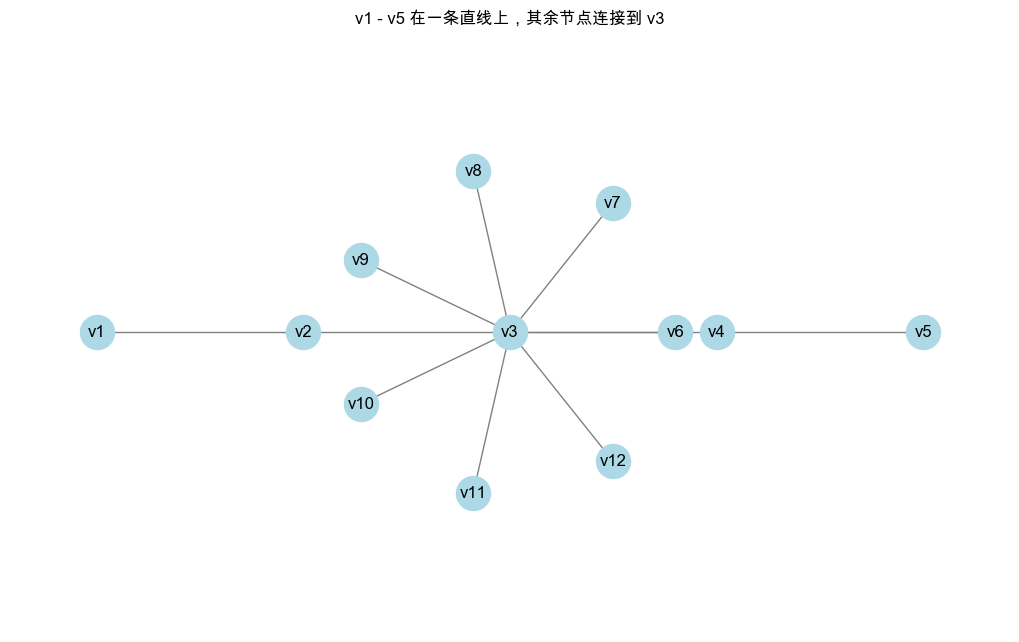

In [48]:
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np


def create_custom_graph(n):
    if n < 6:
        raise ValueError("n 必须大于等于 6")

    G = nx.Graph()

    # 特殊节点：v1, v2, v3, v4, v5
    special_nodes = ['v1', 'v2', 'v3', 'v4', 'v5']
    G.add_nodes_from(special_nodes)

    # 添加边形成路径：v1 - v2 - v3 - v4 - v5
    edges = [('v1', 'v2'), ('v2', 'v3'), ('v3', 'v4'), ('v4', 'v5')]
    G.add_edges_from(edges)

    # 添加其余 n-5 个叶子节点，全部连接到 v3
    for i in range(6, n + 1):  # 从 v6 开始命名
        node_name = f'v{i}'
        G.add_node(node_name)
        G.add_edge(node_name, 'v3')

    return G


# 创建图
n = 12  # 总共 n 个节点
G = create_custom_graph(n)

# 手动定义 v1 - v5 的位置为一条直线
pos = {
    'v1': np.array([0, 0]),
    'v2': np.array([1, 0]),
    'v3': np.array([2, 0]),
    'v4': np.array([3, 0]),
    'v5': np.array([4, 0]),
}

# 将其余节点放在 v3 上方/下方，呈放射状分布
other_nodes = [node for node in G.nodes if node not in pos]
angles = np.linspace(0, 2 * np.pi, len(other_nodes), endpoint=False)

for i, node in enumerate(other_nodes):
    angle = angles[i]
    radius = 0.8
    x = 2 + radius * np.cos(angle)  # 围绕 v3 (2, 0) 分布
    y = 0 + radius * np.sin(angle)
    pos[node] = np.array([x, y])

# 绘图
plt.figure(figsize=(10, 6))
nx.draw(G, pos, with_labels=True, node_color='lightblue', node_size=600, font_size=12, edge_color='gray')
plt.title("v1 - v5 在一条直线上，其余节点连接到 v3")
plt.axis('equal')  # 确保比例一致，不会变形
plt.show()

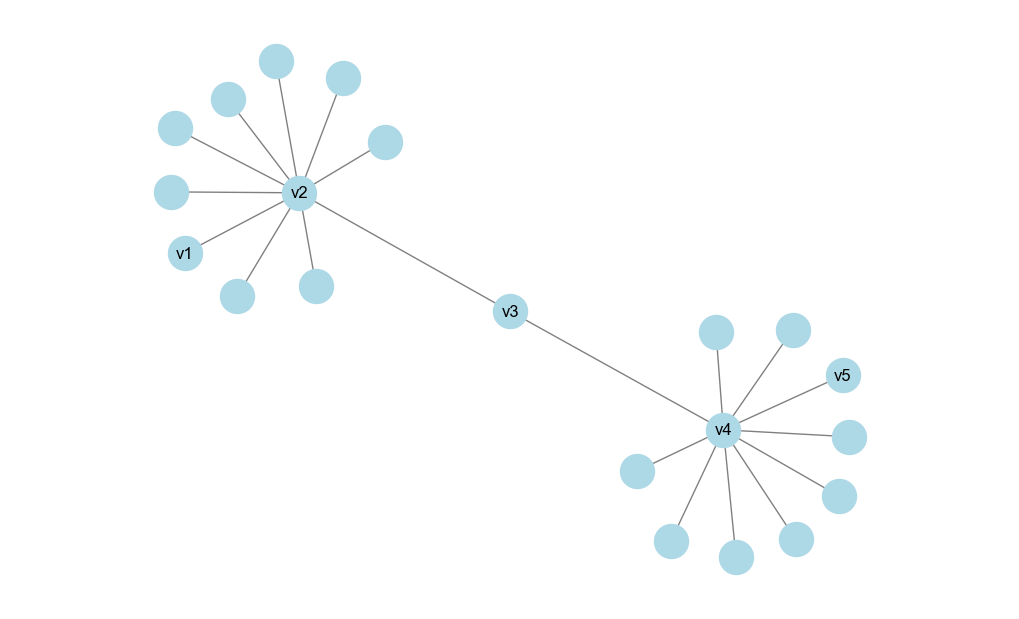

In [66]:
import networkx as nx
import matplotlib.pyplot as plt


def draw_simple_graph(n):
    if n < 6:
        raise ValueError("n 必须大于等于 6")

    G = nx.Graph()

    # 添加核心路径 v1 - v2 - v3 - v4 - v5
    core_nodes = ['v1', 'v2', 'v3', 'v4', 'v5']
    G.add_nodes_from(core_nodes)
    edges = [('v1', 'v2'), ('v2', 'v3'), ('v3', 'v4'), ('v4', 'v5')]
    G.add_edges_from(edges)

    # 添加其余 n-5 个点，均匀分布到 v2 和 v4 上
    extra_nodes = n - 5
    half = extra_nodes // 2

    for i in range(half):
        node_name = f'x{i + 1}'
        G.add_node(node_name)
        G.add_edge(node_name, 'v2')

    for i in range(half, extra_nodes):
        node_name = f'x{i + 1}'
        G.add_node(node_name)
        G.add_edge(node_name, 'v4')

    # 使用 spring_layout 自动布局
    pos = nx.spring_layout(G, seed=42)

    # 绘图
    plt.figure(figsize=(10, 6))

    # 创建标签字典，只为特殊节点设置标签
    labels = {}
    for node in G.nodes():
        if node in ['v1', 'v2', 'v3', 'v4', 'v5']:
            labels[node] = node
        else:
            labels[node] = ''  # 其他节点设置为空字符串

    nx.draw(G, labels=labels, node_color='lightblue', node_size=600, font_size=12, edge_color='gray')
    plt.axis('equal')
    plt.savefig('/Users/zhuzijie/Documents/first/figures/d=4_3.png', dpi=300, bbox_inches='tight')
    plt.show()


# 示例：n = 12 个点
draw_simple_graph(21)

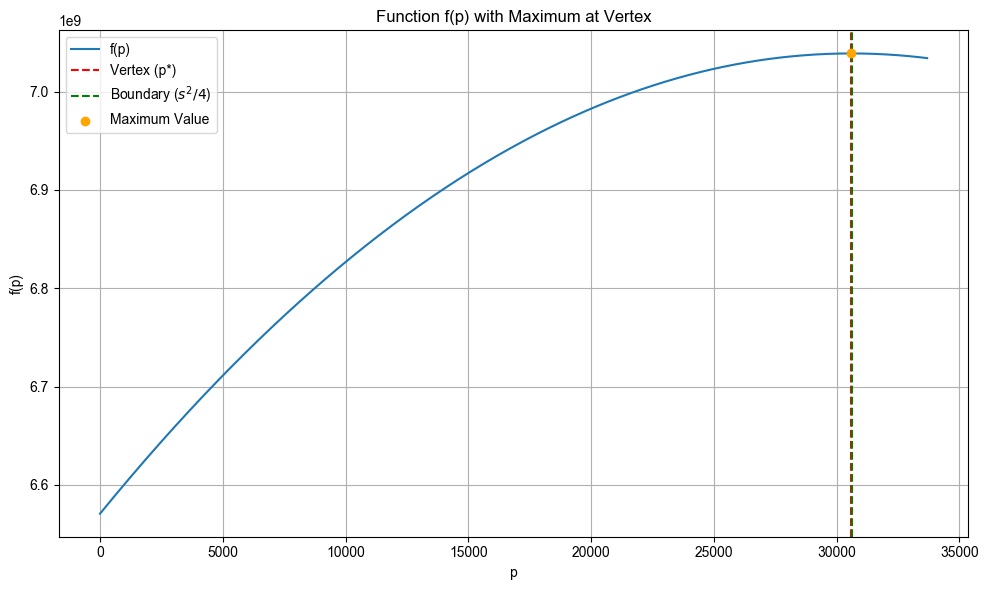

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 参数设置
n = 400
s = 350

# 计算 X, Y
X = n ** 2 - 5 + s * (n - 4) - s ** 2
Y_numerator = 3 * n ** 2 - n + 7 + s * (9 - 2 * n) + 2 * s ** 2
Y = Y_numerator / 12

# 对称轴位置
p_star = 2 * Y - X / 4
p_right = s ** 2 / 4


# 定义 f(p)
def f(p):
    return -0.5 * p ** 2 + (2 * Y - X / 4) * p + X * Y


# 绘图范围
p_values = np.linspace(0, p_right * 1.1, 500)
f_values = [f(p) for p in p_values]

# 找到最大值点
max_index = np.argmax(f_values)
p_max = p_values[max_index]
f_max = f_values[max_index]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(p_values, f_values, label='f(p)')
plt.axvline(p_star, color='r', linestyle='--', label='Vertex (p*)')
plt.axvline(p_right, color='g', linestyle='--', label=r'Boundary ($s^2/4$)')
plt.scatter(p_max, f_max, color='orange', label='Maximum Value', zorder=5)

plt.title('Function f(p) with Maximum at Vertex')
plt.xlabel('p')
plt.ylabel('f(p)')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

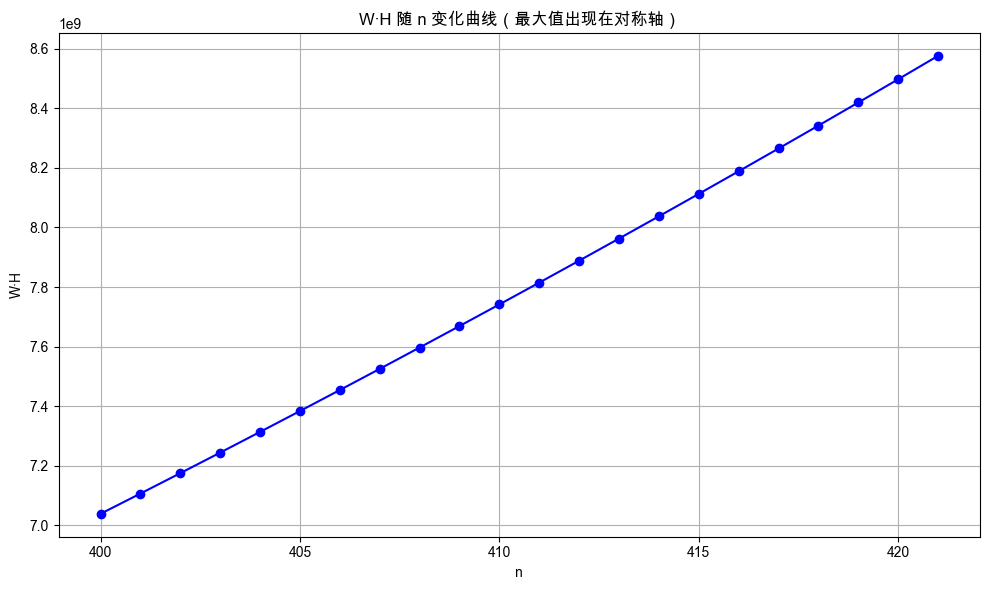

In [40]:
import numpy as np
import matplotlib.pyplot as plt


def compute_X(n, s):
    return n ** 2 - 5 + s * (n - 4) - s ** 2


def compute_Y(n, s):
    numerator = 3 * n ** 2 - n + 7 + s * (9 - 2 * n) + 2 * s ** 2
    return numerator / 12


def compute_p_star(X, Y):
    return 2 * Y - X / 4


def compute_WH_product(X, Y, p_star):
    term1 = -0.5 * p_star ** 2
    term2 = (2 * Y - X / 4) * p_star
    term3 = X * Y
    return term1 + term2 + term3


# 判断是否最大值出现在对称轴处
def is_vertex_max(n, s):
    X = compute_X(n, s)
    Y = compute_Y(n, s)
    p_star = compute_p_star(X, Y)
    p_right = s ** 2 / 4
    return 0 <= p_star <= p_right


# 设置参数范围
n_values = np.arange(400, 501)  # 大 n 区域更容易出现最大值在对称轴
s_values = [350]  # 手动选择一个合适的 s

results = []

for n in n_values:
    for s in s_values:
        if is_vertex_max(n, s):
            X = compute_X(n, s)
            Y = compute_Y(n, s)
            p_star = compute_p_star(X, Y)
            WH = compute_WH_product(X, Y, p_star)
            results.append((n, s, WH))

# 提取数据用于绘图
n_plot = [item[0] for item in results]
WH_plot = [item[2] for item in results]

# 绘图
plt.figure(figsize=(10, 6))
plt.plot(n_plot, WH_plot, marker='o', linestyle='-', color='b')
plt.title('W·H 随 n 变化曲线（最大值出现在对称轴）')
plt.xlabel('n')
plt.ylabel('W·H')
plt.grid(True)
plt.tight_layout()
plt.show()

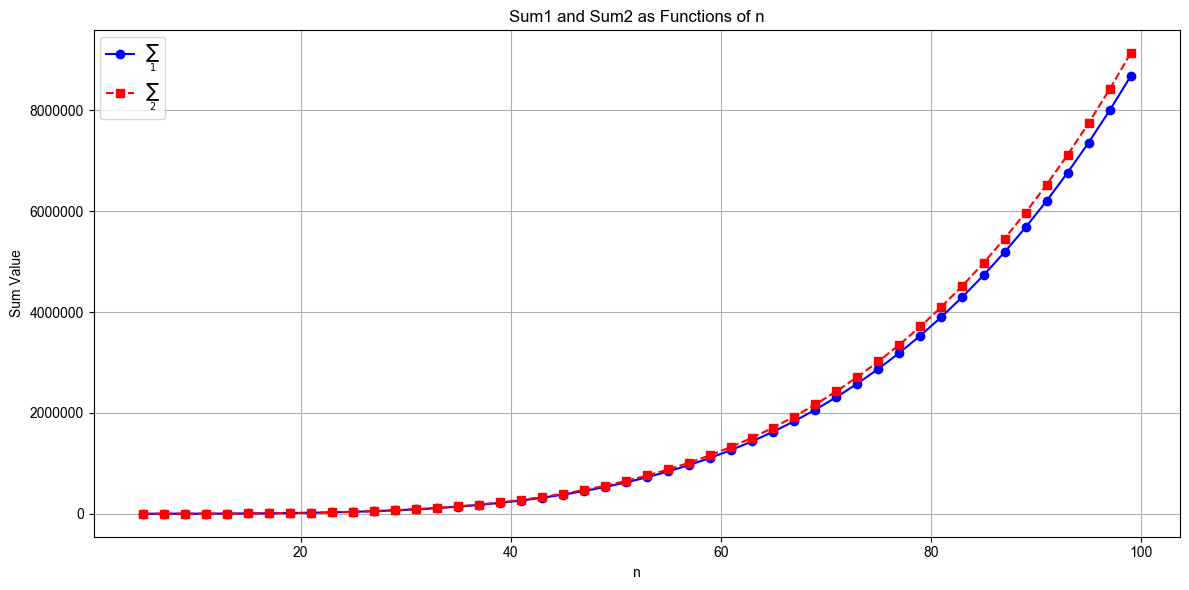

In [75]:
# 星型
def sum1(n):
    m1 = n - 1
    m2 = (n - 1) / 2 + (n - 1) * (n - 3) / 8
    m3 = (n - 1) * (n - 3) / 4
    m4 = (n - 1) * (n - 3) / 8
    return (m1 + m2 + m3 + m4) * (m1 + m2 / 2 + m3 / 3 + m4 / 4)

# 分散型
def sum2(n):
    m1 = n - 1
    m2 = (n - 1) * (n - 3) / 4 + 1
    m3 = n - 3
    m4 = (n - 3) ** 2 / 4
    return (m1 + m2 + m3 + m4) * (m1 + m2 / 2 + m3 / 3 + m4 / 4)


n_values = np.arange(5, 101, 2)

sum1_values = [sum1(n) for n in n_values]
sum2_values = [sum2(n) for n in n_values]

plt.figure(figsize=(12, 6))
plt.plot(n_values, sum1_values, marker='o', linestyle='-', color='blue', label=r'$\sum_1$')
plt.plot(n_values, sum2_values, marker='s', linestyle='--', color='red', label=r'$\sum_2$')
plt.title(r"Sum1 and Sum2 as Functions of n")
plt.xlabel("n")
plt.ylabel(r"Sum Value")
plt.grid(True)
plt.legend()
plt.ticklabel_format(style='plain', axis='y')  # 禁用科学计数法
plt.tight_layout()
# plt.savefig('/Users/zhuzijie/Documents/first/figures/sum_comparison.png', dpi=300, bbox_inches='tight')
plt.show()